In [ ]:
!pip install pyreadr

     |████████████████████████████████| 361 kB 7.5 MB/s 
     |████████████████████████████████| 11.3 MB 60.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pyreadr
import pandas as pd

result = pyreadr.read_r('/content/drive/MyDrive/Colab Notebooks/dataset/acc_walking_IU.rda')
# done! let's see what we got
print(result.keys()) # let's check what objects we got
acc_walking_IU = result["acc_walking_IU"]
acc_walking_IU 

odict_keys(['acc_walking_IU'])


,subj_id,loc_id,time_s,x,y,z
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160
...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090


In [ ]:
# result = pyreadr.read_r('stride_template.rda')
# print(result.keys())
# stride_template = result

In [ ]:
acc_walking_IU

,subj_id,loc_id,time_s,x,y,z
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160
...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090


In [ ]:
acc_walking_IU['loc_id'].unique()

array(['left_wrist', 'left_hip', 'left_ankle', 'right_ankle'],
      dtype=object)

In [ ]:
right_ankle_data = acc_walking_IU[acc_walking_IU.loc_id == "right_ankle"]
right_ankle_data

,subj_id,loc_id,time_s,x,y,z
61959,id86237981,right_ankle,0.00,-0.836,0.305,0.402
61960,id86237981,right_ankle,0.01,-0.859,0.172,0.316
61961,id86237981,right_ankle,0.02,-0.781,0.145,0.242
61962,id86237981,right_ankle,0.03,-0.605,0.191,0.207
61963,id86237981,right_ankle,0.04,-0.441,0.250,0.207
...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
right_ankle_data['magnitude'] = np.sqrt(right_ankle_data['x']**2+right_ankle_data['y']**2+right_ankle_data['z']**2)
right_ankle_data

,subj_id,loc_id,time_s,x,y,z,magnitude
61959,id86237981,right_ankle,0.00,-0.836,0.305,0.402,0.976486
61960,id86237981,right_ankle,0.01,-0.859,0.172,0.316,0.931301
61961,id86237981,right_ankle,0.02,-0.781,0.145,0.242,0.830391
61962,id86237981,right_ankle,0.03,-0.605,0.191,0.207,0.667349
61963,id86237981,right_ankle,0.04,-0.441,0.250,0.207,0.547567
...,...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090,1.067326
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074,1.077683
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090,1.104790
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090,1.141325


In [ ]:
right_ankle_data = right_ankle_data.dropna()
right_ankle_data.shape

(647612, 7)

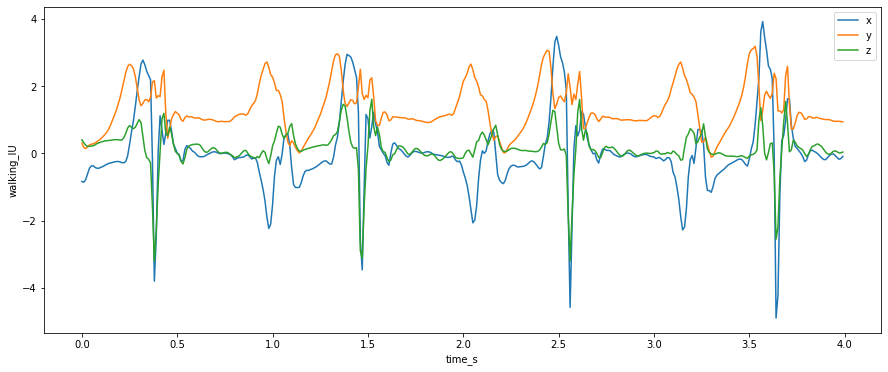

In [ ]:
plt.figure(figsize = (15, 6))
data_36 = right_ankle_data[(right_ankle_data['subj_id'] == 'id86237981') ][:400]
sns.lineplot(y = 'x', x = 'time_s', data = data_36)
sns.lineplot(y = 'y', x = 'time_s', data = data_36)
sns.lineplot(y = 'z', x = 'time_s', data = data_36)
plt.legend(['x', 'y', 'z'])
plt.ylabel('walking_IU')
# plt.title(i, fontsize = 15)
plt.show()

In [ ]:
data_36

,subj_id,loc_id,time_s,x,y,z,magnitude
61959,id86237981,right_ankle,0.00,-0.836,0.305,0.402,0.976486
61960,id86237981,right_ankle,0.01,-0.859,0.172,0.316,0.931301
61961,id86237981,right_ankle,0.02,-0.781,0.145,0.242,0.830391
61962,id86237981,right_ankle,0.03,-0.605,0.191,0.207,0.667349
61963,id86237981,right_ankle,0.04,-0.441,0.250,0.207,0.547567
...,...,...,...,...,...,...,...
62354,id86237981,right_ankle,3.95,-0.063,0.949,0.074,0.953963
62355,id86237981,right_ankle,3.96,-0.125,0.953,0.047,0.962311
62356,id86237981,right_ankle,3.97,-0.176,0.953,0.012,0.969190
62357,id86237981,right_ankle,3.98,-0.156,0.945,0.016,0.957923


In [ ]:
len(data_36)

400

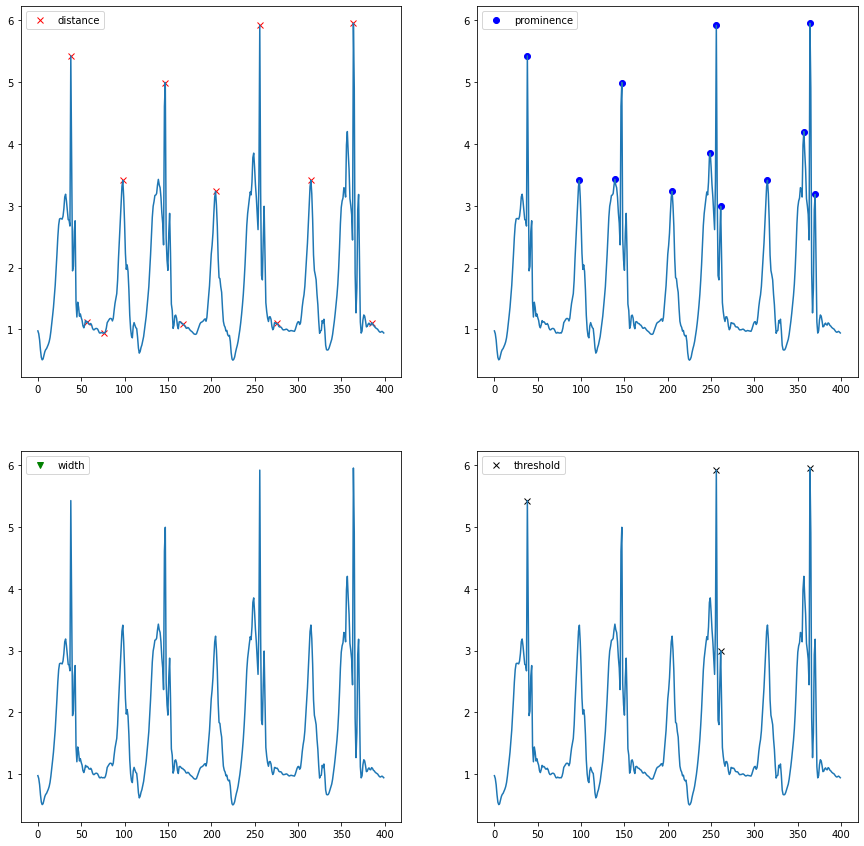

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

f, axs = plt.subplots(2,2,figsize=(15,15))

x = data_36['magnitude'].values
peaks, _ = find_peaks(x, distance=18)
peaks2, _ = find_peaks(x, prominence=1)      # BEST!
peaks3, _ = find_peaks(x, width=18)
peaks4, _ = find_peaks(x, threshold=0.4)     # Required vertical distance to its direct neighbouring samples, pretty useless

plt.subplot(2, 2, 1)
plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance'])

plt.subplot(2, 2, 2)
plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['prominence'])

plt.subplot(2, 2, 3)
plt.plot(peaks3, x[peaks3], "vg"); plt.plot(x); plt.legend(['width'])

plt.subplot(2, 2, 4)
plt.plot(peaks4, x[peaks4], "xk"); plt.plot(x); plt.legend(['threshold'])

plt.show()

In [ ]:
appended_data = []
df = []

for k in right_ankle_data.subj_id.unique():
    data_1 = right_ankle_data[(right_ankle_data['subj_id'] == k) ]

    x = data_1['magnitude'].values

    peaks2, _ = find_peaks(x, prominence=0.5) 
    initial = np.zeros(shape = len(x))

    start = peaks2[0]

    for index,each in enumerate(peaks2):
      
      if(index %2 != 0):
        initial[start:each] = 1
      start = each

    data_1["label"] = initial
    df.append(data_1)

appended_data = pd.concat(df)

appended_data

,subj_id,loc_id,time_s,x,y,z,magnitude,label
61959,id86237981,right_ankle,0.00,-0.836,0.305,0.402,0.976486,0.0
61960,id86237981,right_ankle,0.01,-0.859,0.172,0.316,0.931301,0.0
61961,id86237981,right_ankle,0.02,-0.781,0.145,0.242,0.830391,0.0
61962,id86237981,right_ankle,0.03,-0.605,0.191,0.207,0.667349,0.0
61963,id86237981,right_ankle,0.04,-0.441,0.250,0.207,0.547567,0.0
...,...,...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090,1.067326,0.0
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074,1.077683,0.0
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090,1.104790,0.0
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090,1.141325,0.0


In [ ]:
appended_data[28:50]

,subj_id,loc_id,time_s,x,y,z,magnitude,label
61987,id86237981,right_ankle,0.28,1.391,2.285,0.773,2.784535,0.0
61988,id86237981,right_ankle,0.29,1.855,1.945,0.887,2.830339,0.0
61989,id86237981,right_ankle,0.30,2.273,1.594,1.004,2.952182,0.0
61990,id86237981,right_ankle,0.31,2.656,1.414,0.910,3.143538,0.0
61991,id86237981,right_ankle,0.32,2.773,1.488,0.504,3.187113,1.0
61992,id86237981,right_ankle,0.33,2.633,1.586,0.086,3.074977,1.0
61993,id86237981,right_ankle,0.34,2.438,1.602,-0.129,2.920084,1.0
61994,id86237981,right_ankle,0.35,2.309,1.531,-0.172,2.775793,1.0
61995,id86237981,right_ankle,0.36,2.188,1.668,-0.289,2.766422,1.0
61996,id86237981,right_ankle,0.37,-0.207,2.121,-1.613,2.672688,1.0


In [ ]:
appended_data.to_csv("right_ankle_dataWithlabels.csv")

In [ ]:
x = data_36['magnitude'].values
peaks2, _ = find_peaks(x, prominence=0.5)
peaks2

array([   31,    93,   138,   204,   248,   315,   356,   422,   459,
         562,   630,   668,   734,   774,   841,   880,   946,   988,
        1051,  1091,  1156,  1196,  1263,  1304,  1367,  1408,  1459,
        1511,  1562,  1617,  1681,  1721,  1787,  1827,  1877,  1932,
        1984,  2038,  2088,  2142,  2204,  2244,  2294,  2351,  2399,
        2455,  2502,  2557,  2606,  2660,  2723,  2762,  2816,  2868,
        2918,  2974,  3023,  3078,  3125,  3178,  3227,  3281,  3331,
        3387,  3435,  3490,  3539,  3595,  3646,  3698,  3752,  3802,
        3870,  3908,  3961,  4012,  4061,  4117,  4180,  4222,  4270,
        4327,  4389,  4430,  4480,  4537,  4586,  4642,  4706,  4746,
        4795,  4852,  4900,  4956,  5006,  5058,  5109,  5164,  5212,
        5270,  5332,  5372,  5438,  5478,  5540,  5580,  5629,  5685,
        5735,  5791,  5837,  5894,  5942,  5999,  6047,  6101,  6150,
        6204,  6268,  6309,  6373,  6414,  6521,  6568,  6625,  6732,
        6782,  6834,

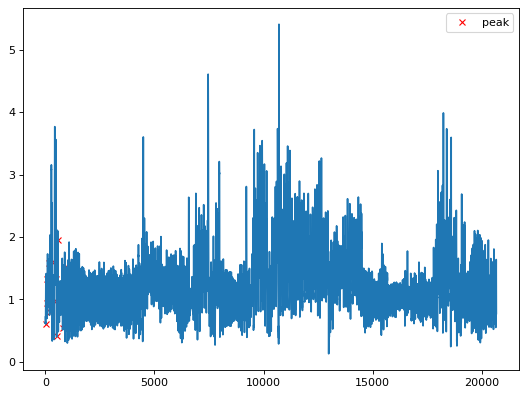

In [ ]:
from scipy import signal
from matplotlib.pyplot import figure
xs = np.arange(0, np.pi, 0.05)
data = data_36['magnitude'].values
# peakind = signal.find_peaks_cwt(data, np.arange(1,10))
peakind = signal.find_peaks_cwt(data, widths = np.arange(1,30) )  
figure(figsize=(8, 6), dpi=80)
plt.plot(peakind, x[peakind], "xr"); plt.plot(x); plt.legend(['peak'])
plt.show()